## BIA Bob demo
BIA Bob is a Jupyter-magic based assistant for interacting with data via code

In [1]:
from bia_bob import bob
bob.initialize('gpt-4')
bob.__version__

'0.5.0'

You can use the `%bob` single-line or the `%%bob` multi-line magic to ask for programming image analysis tasks and `bob` will do it for you.

In [2]:
%bob Load the blobs.tif image file and show it.

Firstly, I will load the required library for image reading functionality that is 'skimage.io'. Then, I will use 'imread' function to read the image 'blobs.tif' and store it in a variable. After that, to visualise the loaded image, I will use the 'stackview' library's 'insight' function.

Here is the Python code for the task:

StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
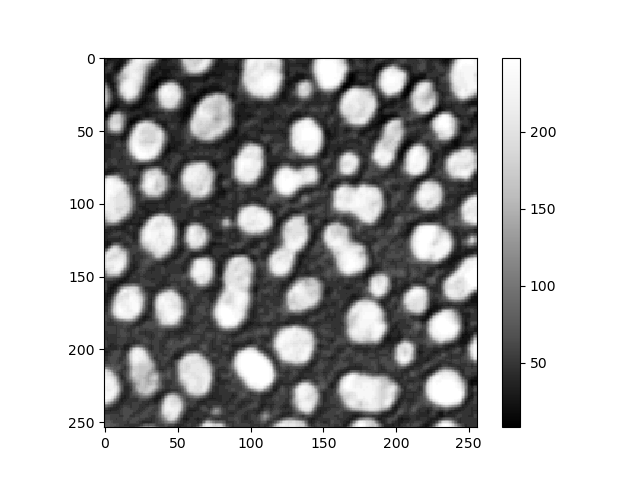
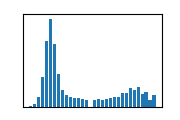

In [3]:
from skimage.io import imread
import stackview

# Load the image 
image = imread('blobs.tif')

# Display the image
stackview.insight(image)

In [4]:
%%bob
Load the blobs.tif grayscale image from disc.
Segment the nuclei-like objects in it using 
Otsu's method and connected component labeling.
Measure area of the segmented labels.
Print the area on top of the labels.

First, the task can be performed with these steps:

1. Load the grayscale image from the disk using the imread() function from the skimage.io package.
2. Segment the nuclei-like objects. For this, we will first apply Otsu's method to convert the grayscale image into a binary image. skimage.filters package's threshold_otsu() function will be used for this. After this, we need to label the connected components on the binary image. skimage.measure's label() function can be used for this.
3. For measuring the area of the segmented labels, we will use regionprops_table() function of skimage.measure package. This function gives us a dictionary from which we can extract the area of each label.
4. The last task is to print the area on top of the labels. matplotlib.pyplot's text() function will be used to print the area on the segmented image.

Here is the corresponding Python code for the task:

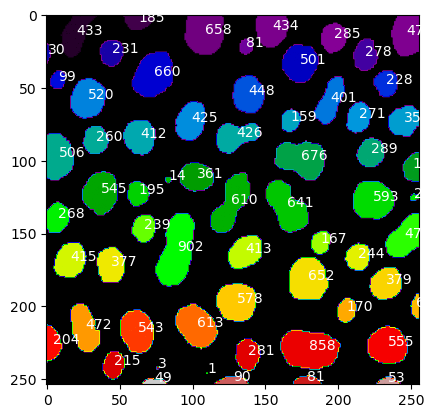

In [7]:
import numpy as np
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops_table
import matplotlib.pyplot as plt

# Load the image 
image = imread('blobs.tif')

# Segment the image using Otsu's method and connected component labeling
thresh = threshold_otsu(image)
binary = image > thresh
labels = label(binary)

# Measure area and centroid of the segmented labels
properties = regionprops_table(labels, properties=('label', 'area', 'centroid'))

# Print the area on top of the labels
plt.imshow(labels, cmap='nipy_spectral')

# Now, correctly iterate over the regions
for i in range(len(properties['label'])):
    plt.text(properties['centroid-1'][i], properties['centroid-0'][i], str(properties['area'][i]), color='white')

plt.show()

In [8]:
%%bob
Take the segmented label image and expand the labels by 4 pixels. Show the resulting label image alone.

The action plan here would be to:

1. Expand the labels by a given radius in the label image using expand_labels function from skimage.segmentation library.
2. Finally, display the expanded_labels using stackview.insight function.

Following is the Python code for these tasks:

StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
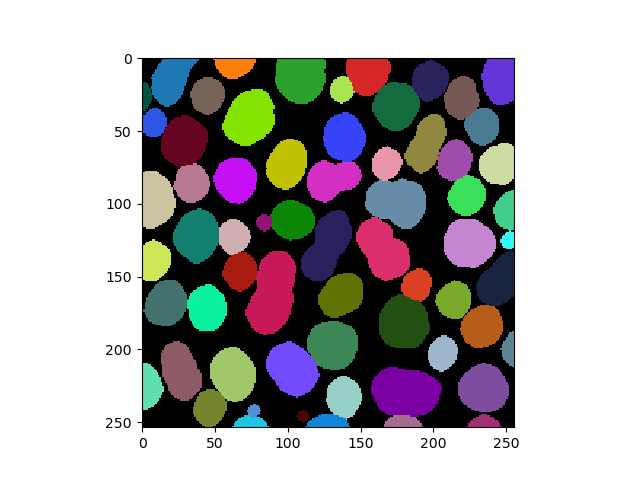

In [9]:
from skimage.segmentation import expand_labels
import stackview

# Expand labels by a given radius in a label image
expanded_labels = expand_labels(labels, distance=4)

# Display the image
stackview.insight(expanded_labels)